# Question based on Gender dataset

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
from scipy import stats

In [3]:
#importing read files to read out the data from excel file
from pandas import read_excel
df = pd.read_excel('genderweight.xlsx')
df.head()
#Calls out top 5 rows from the dataframe

,Females,Weight_females,Males,Weight_males
0,F,61.585869,M,89.737485
1,F,64.554858,M,86.301228
2,F,66.168882,M,86.576987
3,F,59.308605,M,91.527742
4,F,64.858249,M,85.184539


## Q1. Shape of the data? -shape method will give the output as total number of rows and columns in our dataset 

In [4]:
df.shape
#total number of rows,total number of columns

(20, 4)

## Q2. Check for assumptions for this test if it follows equal variance assumed or not.

         Null hypothesis(H0): Equal variance assumed for the two independent samples.
    Alternate hypothesis(H1): Equal variance not assumed for the two independent samples.

In [5]:
pg.normality(df)
#To examine if the columns are normally distributed or not/normality check from pingouin library.

,W,pval,normal
Weight_females,0.938473,0.224329,True
Weight_males,0.986340,0.988560,True


{'whiskers': [<matplotlib.lines.Line2D at 0x2a47fcbe8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a47fcbef70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a47fcbe550>,
 'medians': [<matplotlib.lines.Line2D at 0x2a47ff28670>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a47ff289d0>,
 'means': []}

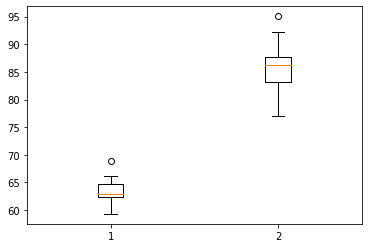

In [6]:
#We assign a variable named data and store our weight columns from the dataset into this variable and plot the data in boxplot.
data=[df['Weight_females'],df['Weight_males']]
plt.boxplot(data)
#The boxplot is showing us clearly that they have unequal variance and has some outliers but they are not extreme outliers.

(array([1., 0., 2., 9., 1., 4., 1., 1., 0., 1.]),
 array([59.30860459, 60.26091117, 61.21321775, 62.16552432, 63.1178309 ,
        64.07013748, 65.02244405, 65.97475063, 66.9270572 , 67.87936378,
        68.83167036]),
 <BarContainer object of 10 artists>)

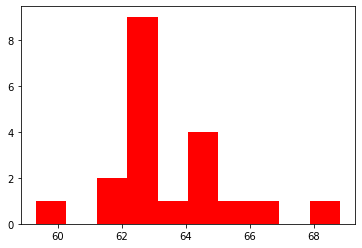

In [7]:
#Histogram for our Weight_females data column to visualize that it is normally distributed.
plt.hist(df['Weight_females'],color='red')

(array([1., 1., 2., 3., 2., 6., 1., 1., 2., 1.]),
 array([77.00978193, 78.81506739, 80.62035285, 82.4256383 , 84.23092376,
        86.03620922, 87.84149467, 89.64678013, 91.45206559, 93.25735105,
        95.0626365 ]),
 <BarContainer object of 10 artists>)

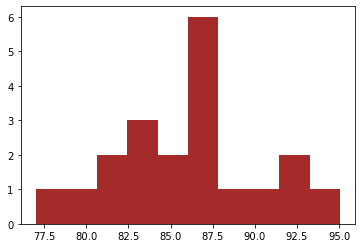

In [8]:
#Histogram for our Weight_males data column to visualize that it is normally distributed.
plt.hist(df['Weight_males'],color='brown')

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

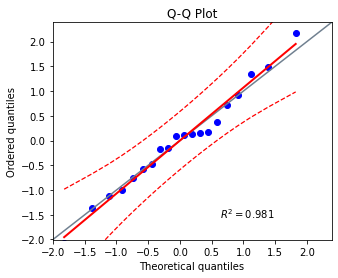

In [9]:
pg.qqplot(df['Weight_males'],dist='norm')

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

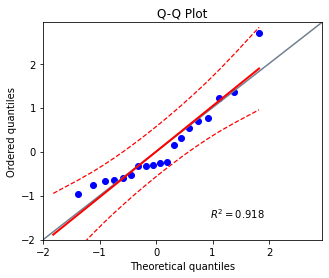

In [10]:
pg.qqplot(df['Weight_females'],dist='norm')

### levene test :To check the homogeneity of variance.

In [11]:
#Creating two variable for the weight columns from the dataset male weight and female weight.
M_w=df['Weight_males']
Fm_w=df['Weight_females']

In [12]:
#Using scipy library to check for levene test.
stats.levene(M_w, Fm_w)

LeveneResult(statistic=6.116972600402776, pvalue=0.01797467699989902)

#Both the p-values about the median and mean are 'p< 0.05' means equal variance not assumed which is our alternate hypothesis.
Since our datapoints are not highly skewed so we can still go for two sample ttest with n<30.

## Q3. To examine the measures of central tendency-"Median(as we have outliers)" and measure of dispersion- 'Std dev' based on assumptions.

In [13]:
M_w.median()

86.27215411746431

In [14]:
M_w.mean()

85.8261153379823

In [15]:
M_w.std()

4.353520314161602

In [16]:
Fm_w.mean()

63.49867188220803

In [17]:
Fm_w.median()

62.94235863840915

In [18]:
Fm_w.std()

2.0276151941190665

## Q5. Test statistics of the independent variable like pval,CI,dofreedom,test value etc.

In [19]:
#importing independent ttest from the scipy library
from scipy.stats import ttest_ind

In [59]:
#performing the ttest using two independent samples with unequal variance
ttest_ind( Fm_w ,M_w , equal_var=False)

Ttest_indResult(statistic=-20.79137772174724, pvalue=4.298062353095335e-18)

In [60]:
#ttest using pingouin library
pg.ttest( Fm_w ,M_w ,correction='auto')
#auto will take care if unequal variance is assumed.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-20.791378,38,two-sided,2.331459e-22,"[-24.5, -20.15]",6.574811,8.514e+18,1.0


In [54]:
stats.shapiro(Fm_w)

ShapiroResult(statistic=0.938473105430603, pvalue=0.22432927787303925)

In [22]:
#other parameters for our datapoints
df.describe()

,Weight_females,Weight_males
count,20.000000,20.000000
mean,63.498672,85.826115
std,2.027615,4.353520
min,59.308605,77.009782
25%,62.299224,83.171944
50%,62.942359,86.272154
75%,64.630706,87.765223
max,68.831670,95.062637


# Questions based on mtcars dataset

In [28]:
#reading csv data file into a new dataframe df_N
df_N=pd.read_csv('mtcars.csv')
df_N.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [29]:
#addressing only 'Numerical data' from the dataset to check for normality and creating a new df as Newdf as check point.
Newdf=df_N[['mpg','disp','hp','drat','wt','qsec','carb']]
Newdf.head()

,mpg,disp,hp,drat,wt,qsec,carb
Mazda RX4,21.0,160.0,110,3.90,2.620,16.46,4
Mazda RX4 Wag,21.0,160.0,110,3.90,2.875,17.02,4
Datsun 710,22.8,108.0,93,3.85,2.320,18.61,1
Hornet 4 Drive,21.4,258.0,110,3.08,3.215,19.44,1
Hornet Sportabout,18.7,360.0,175,3.15,3.440,17.02,2


## Q1. Test to examine the normality of the columns and datapoints.

In [30]:
#Simple Normality check using pingouin library in True or False
pg.normality(Newdf)

,W,pval,normal
mpg,0.947565,0.122881,True
disp,0.920013,0.020806,False
hp,0.933419,0.048807,False
drat,0.945884,0.110060,True
wt,0.943258,0.092656,True
qsec,0.973251,0.593525,True
carb,0.851097,0.000438,False


ShapiroResult(statistic=0.9475647211074829, pvalue=0.12288112193346024)

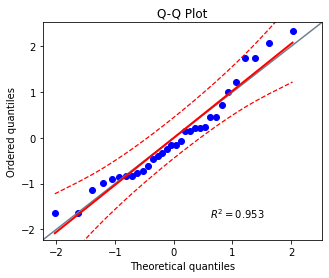

In [31]:
pg.qqplot(Newdf['mpg'])#qqplot
stats.shapiro(Newdf['mpg'])#shapiro test

ShapiroResult(statistic=0.9458838701248169, pvalue=0.11006041616201401)

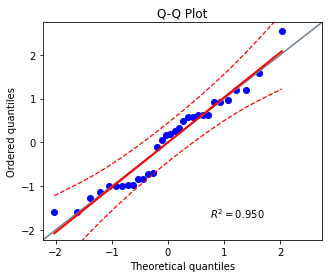

In [32]:
pg.qqplot(Newdf['drat'])#qqplot
stats.shapiro(Newdf['drat'])#shapiro test

ShapiroResult(statistic=0.9432578682899475, pvalue=0.09265592694282532)

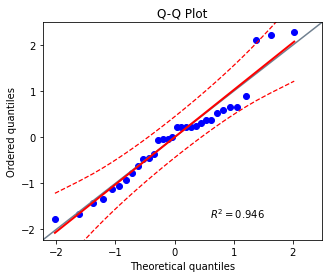

In [33]:
pg.qqplot(Newdf['wt'])#qqplot
stats.shapiro(Newdf['wt'])#shapiro test

ShapiroResult(statistic=0.9732511639595032, pvalue=0.5935246348381042)

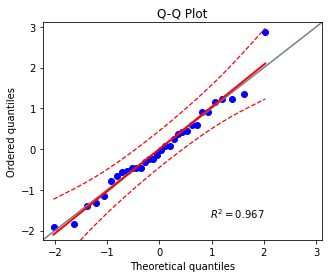

In [34]:
pg.qqplot(Newdf['qsec'])#qqplot
stats.shapiro(Newdf['qsec'])#shapiro test

## Q2. After verifying all the columns and performing normality checks, The columns which are not normally distributed are 'disp,hp and carb'.

ShapiroResult(statistic=0.9200125932693481, pvalue=0.020806478336453438)

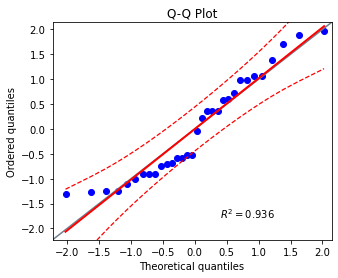

In [35]:
pg.qqplot(Newdf['disp'])#qqplot
stats.shapiro(Newdf['disp'])#shapiro

ShapiroResult(statistic=0.933418869972229, pvalue=0.0488068051636219)

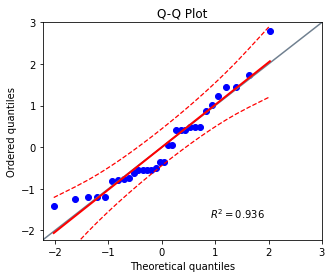

In [36]:
pg.qqplot(Newdf['hp'])#qqplot
stats.shapiro(Newdf['hp'])#shapiro

ShapiroResult(statistic=0.8510971069335938, pvalue=0.00043823738815262914)

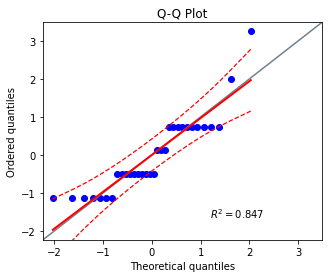

In [37]:
pg.qqplot(Newdf['carb'])#qqplot
stats.shapiro(Newdf['carb'])#shapiro

## Q3. We have to calculate mean and median values of each column and see if there is a difference(using pandas library).

In [38]:
print(Newdf['mpg'].mean())
print(Newdf['mpg'].median())

#Almost equal

20.090624999999996
19.2


In [39]:
print(Newdf['disp'].mean())
print(Newdf['disp'].median())

#Not equal but no outliers

230.72187500000004
196.3


In [40]:
print(Newdf['hp'].mean())
print(Newdf['hp'].median())

#clear presence of outliers which deviates the mean

146.6875
123.0


In [41]:
print(Newdf['drat'].mean())
print(Newdf['drat'].median())

#Almost equal 

3.5965625000000006
3.6950000000000003


In [42]:
print(Newdf['wt'].mean())
print(Newdf['wt'].median())

#Almost equal

3.2172499999999995
3.325


In [43]:
print(Newdf['qsec'].mean())
print(Newdf['qsec'].median())

#Almost equal

17.848750000000003
17.71


In [44]:
print(Newdf['carb'].mean())
print(Newdf['carb'].median())

#Few outliers and mean gets effected

2.8125
2.0


## Q4. Which variables are collinear?

In [45]:
#importing seaborn library for the correlation plot as sns
import seaborn as sns

Text(0.5, 1.0, 'Multi-Collinearity of mtcars Attributes')

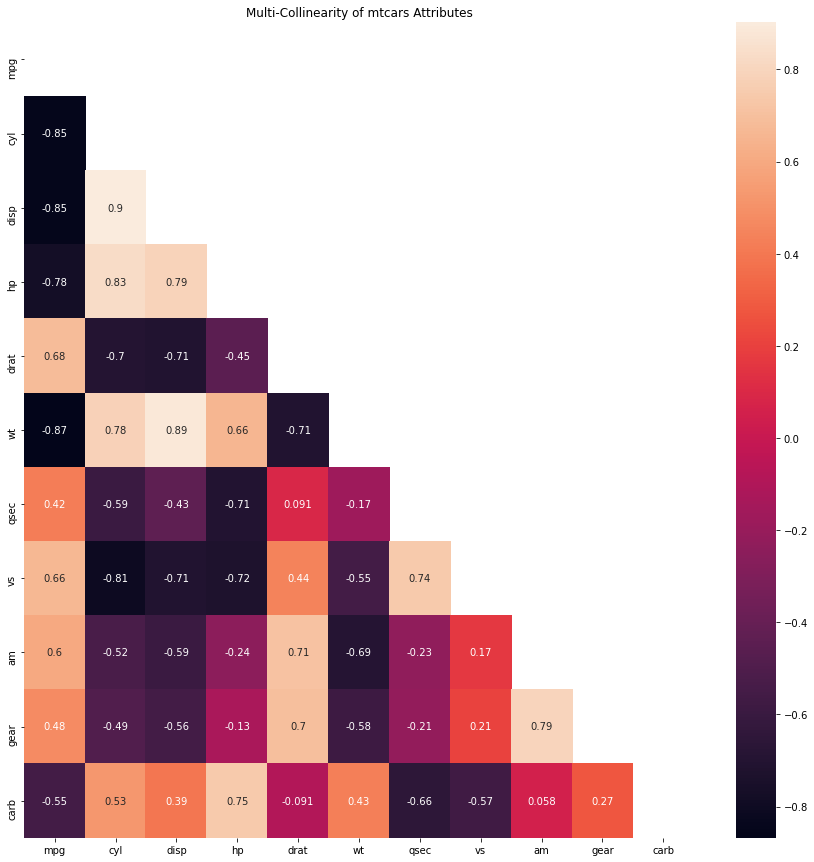

In [46]:
corr=df_N.corr()
fig = plt.subplots(figsize=(15,15))
rat=np.triu(np.ones_like(corr,dtype=bool))
x=sns.heatmap(df_N.corr(), annot=True,mask=rat)      #using corr() method and passing the dataframe we have to x to plot the heatmap
x.set_title("Multi-Collinearity of mtcars Attributes")

In [47]:
Newdf.rcorr(stars=False)

#Lower triangle is spearman coefficient and upper triangle shows the pvalue.

,mpg,disp,hp,drat,wt,qsec,carb
mpg,-,0.000,0.000,0.000,0.000,0.017,0.001
disp,-0.848,-,0.000,0.000,0.000,0.013,0.025
hp,-0.776,0.791,-,0.01,0.000,0.000,0.000
drat,0.681,-0.71,-0.449,-,0.000,0.62,0.621
wt,-0.868,0.888,0.659,-0.712,-,0.339,0.015
qsec,0.419,-0.434,-0.708,0.091,-0.175,-,0.000
carb,-0.551,0.395,0.75,-0.091,0.428,-0.656,-


In [48]:
from scipy.stats import spearmanr

In [50]:
corr, _ = spearmanr(Newdf['mpg'],Newdf['disp'])

In [51]:
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.909
